In [1]:
# for python 2.x and 3.x support
from __future__ import division, print_function, unicode_literals

# computation libraries used
import pandas as pd
import numpy as np

#### graphing libraries ####
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

from IPython.display import SVG
from graphviz import Source

from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
############################


# sklearn for ML
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

# mjd to norml time conversion
from datetime import datetime, timedelta

What categories does this project fall in?

# Q.1. What does the data look like?

In [2]:
sloan = pd.read_csv('./Skyserver_SQL2_27_2018 6_51_39 PM.csv')

In [3]:
sloan.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


## Datatypes present

In [4]:
sloan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
objid        10000 non-null float64
ra           10000 non-null float64
dec          10000 non-null float64
u            10000 non-null float64
g            10000 non-null float64
r            10000 non-null float64
i            10000 non-null float64
z            10000 non-null float64
run          10000 non-null int64
rerun        10000 non-null int64
camcol       10000 non-null int64
field        10000 non-null int64
specobjid    10000 non-null float64
class        10000 non-null object
redshift     10000 non-null float64
plate        10000 non-null int64
mjd          10000 non-null int64
fiberid      10000 non-null int64
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


No null values present in any column

## Understanding the significance of features present

 1. ~~objid~~  
 Unique ID given to an object by the data collection process
 
 2. **ra**  
 Right ascention. Analogous to longitude on Earth
 
 3. **dec**  
 Distance of object from horizon. usually measured in degrees. Analogous to latitude on Earth
 
 4. **u, g, r, i, z**  
 Wavelength filters in the telescope Ultraviolet, Green, Red, Near-infrared, Infrared
 
 5. ~~run~~  
 ID of observed strip in the run
 
 6. ~~rerun~~  
 Reprocessing ID of the run strip
 
 7. ~~camcol~~  
 ID given to a part of a run
 
 8. ~~field~~  
 Photo member of a camcol. It is 2048x1498 pixels wide
 
 9. ~~specobjid~~  
 UID for an object generated using few other fields
 
 10. **redshift**  
 Stretching of light waves due to presence of relative velocity between two bodies
 
 11. ~~plate~~  
 Telescope contains 6 plates. This is a unique identifier
 
 12. **mjd**  
 Modified Julian Date  
 > Julian Date begins from January 1 4713 BC  
 > MJD adds 24,00,000.5 days to it and begins from November 17 1858
 
 13. ~~fiberid~~  
 Optical fiber identifier, which brings light towards the slit

## The 5-number summary

In [5]:
sloan.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,0.000000e+00,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [6]:
sloan.drop(columns=['objid', 'run', 'rerun', 'camcol', 'field', 'specobjid', 'fiberid', 'plate'], inplace=True)

In [7]:
sloan.head()

,ra,dec,u,g,r,i,z,class,redshift,mjd
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,STAR,-0.000009,54922
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,STAR,-0.000055,51615
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,GALAXY,0.123111,52023
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,STAR,-0.000111,54922
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,STAR,0.000590,54922


# Q2. What insights can the data provide? (EDA)

## Univariate Analysis

How are the objects positioned in the sky?

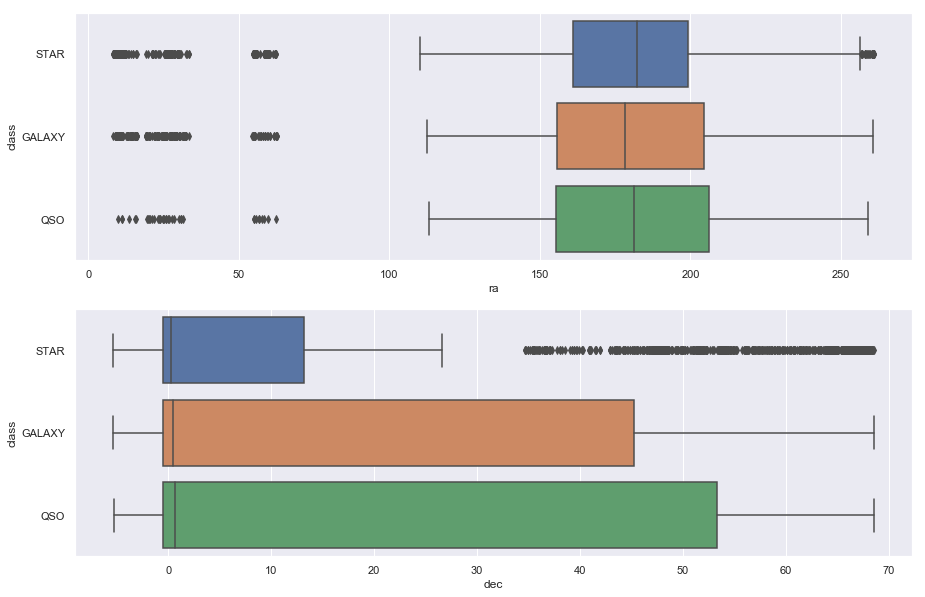

In [8]:
f, axes = plt.subplots(2, 1, figsize=(15, 10))
sns.boxplot(y='class', x='ra', data=sloan, ax=axes[0])
sns.boxplot(y='class', x='dec', data=sloan, ax=axes[1])

Find Out: Why are the stellar objects positioned this way? (HINT Look for Baryon Acoustic Oscillation)

Is the redshift representative of any properties of the objects?

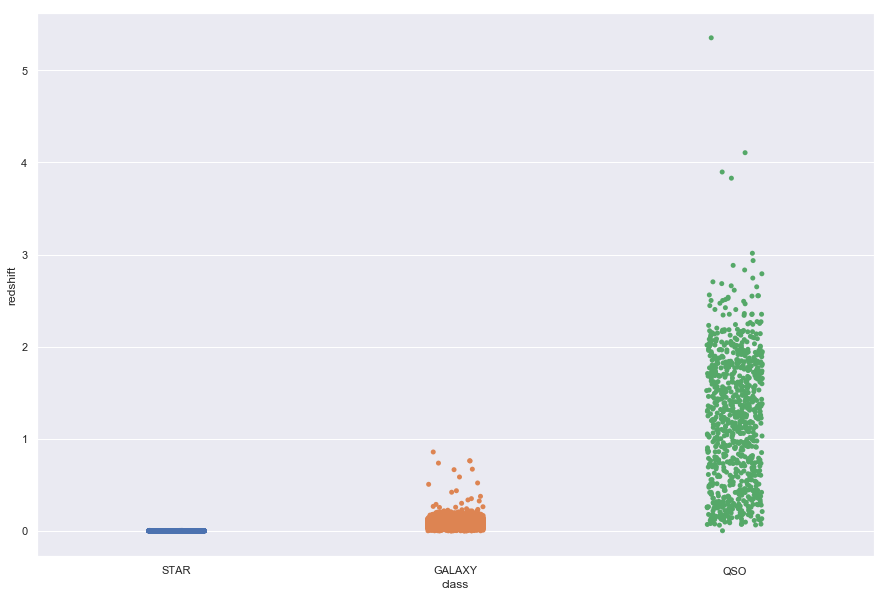

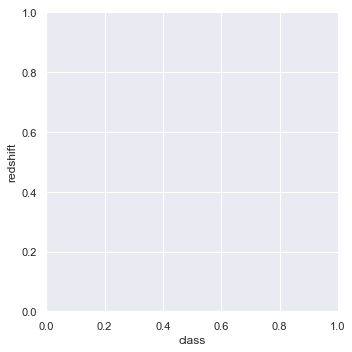

In [9]:
f, ax = plt.subplots(figsize=(15, 10))
sns.catplot(y='redshift', x='class', data=sloan, ax=ax)

Stars have the lowest average redshift, followed by Galaxies and then Quasars. What do the distributions of *u, g, r, i, z* filters look like?

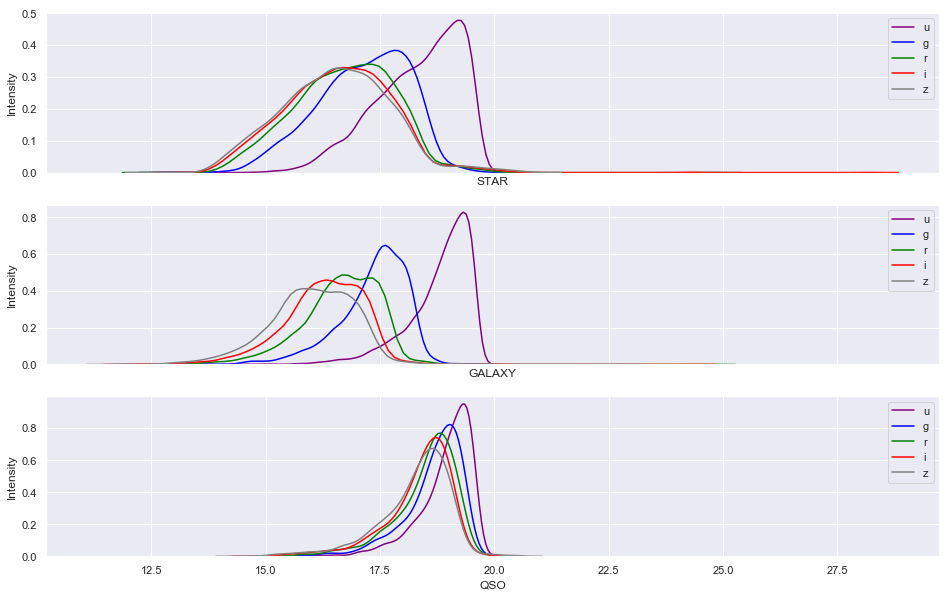

In [10]:
f, axes = plt.subplots(3, 1, figsize=(16, 10), sharex=True)
c = ['STAR', 'GALAXY', 'QSO']

for ax_id in range(3):
    sns.distplot(sloan.loc[sloan['class']==c[ax_id],'u'], hist=False, color='purple', ax=axes[ax_id], label='u')
    sns.distplot(sloan.loc[sloan['class']==c[ax_id],'g'], hist=False, color='blue', ax=axes[ax_id], label='g')
    sns.distplot(sloan.loc[sloan['class']==c[ax_id],'r'], hist=False, color='green', ax=axes[ax_id], label='r')
    sns.distplot(sloan.loc[sloan['class']==c[ax_id],'i'], hist=False, color='red', ax=axes[ax_id], label='i')
    sns.distplot(sloan.loc[sloan['class']==c[ax_id],'z'], hist=False, color='grey', ax=axes[ax_id], label='z')
    axes[ax_id].set(xlabel=c[ax_id], ylabel='Intensity')

<pre>
Green    filter o/p goes in to Blue  part of the image  
Red      filter o/p goes in to Green part of the image  
Infrared filter o/p goes in to Red   part of the image  
</pre>

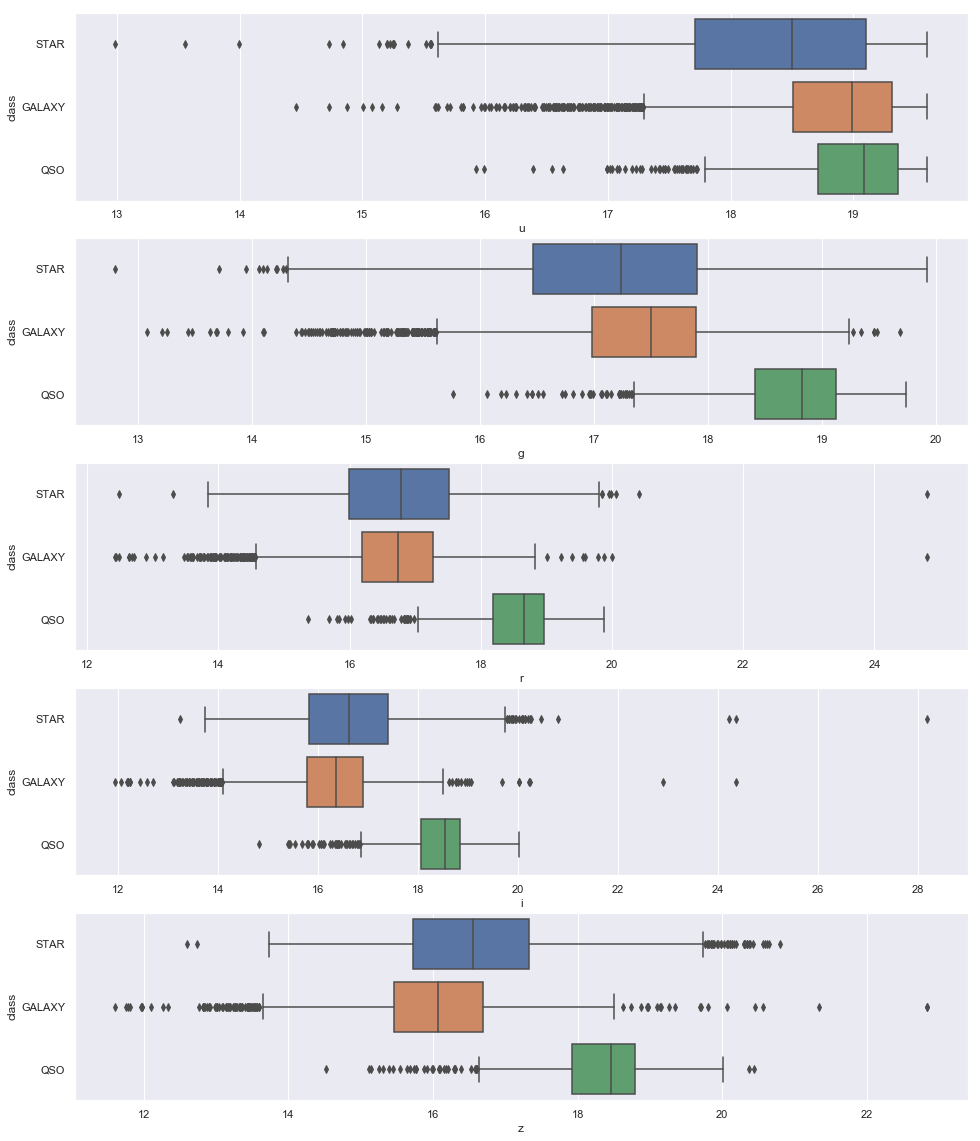

In [11]:
f, axes = plt.subplots(5, 1, figsize=(16, 20))
c = ['u','g', 'r', 'i', 'z']

for idx, cls in enumerate(c):
    sns.boxplot(y='class', x=cls, data=sloan, ax=axes[idx])

Can we visualise the discovery timeline for various objects?

In [ ]:
# MJD starts at 17th November 1858, midnight
_MJD_BASE_TIME_ = datetime.strptime('17/11/1858 00:00', '%d/%m/%Y %H:%M')

def convertMJD(x=0):
    return _MJD_BASE_TIME_ + timedelta(days=x)

In [12]:
timeline_stars  = sloan.loc[sloan['class']=='STAR'  , 'mjd']
timeline_galaxy = sloan.loc[sloan['class']=='GALAXY', 'mjd']
timeline_qso    = sloan.loc[sloan['class']=='QSO'   , 'mjd']

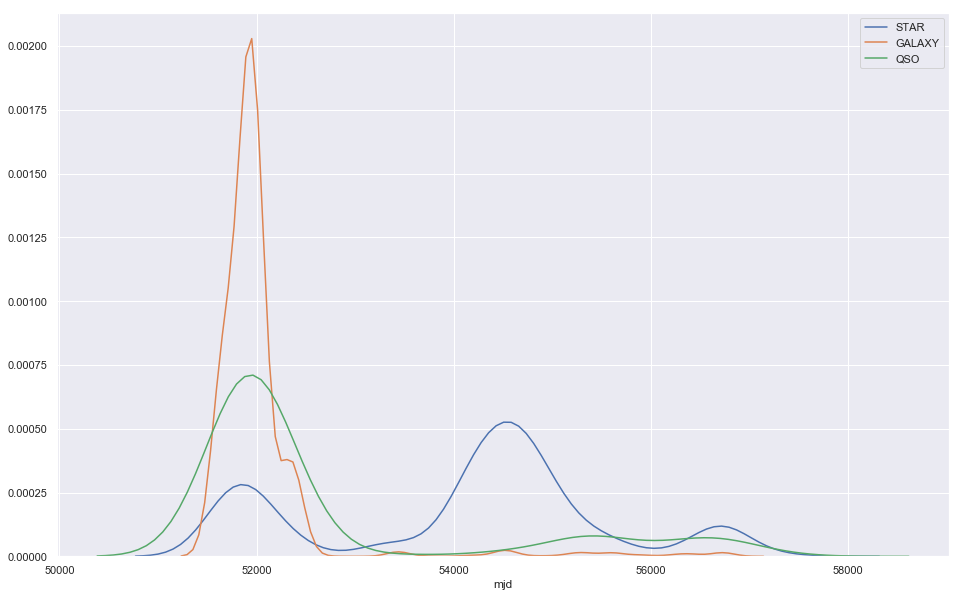

In [13]:
f, ax = plt.subplots(figsize=(16, 10))
sns.distplot(timeline_stars , hist=False, label='STAR'  , ax=ax)
sns.distplot(timeline_galaxy, hist=False, label='GALAXY', ax=ax)
sns.distplot(timeline_qso   , hist=False, label='QSO'   , ax=ax)

Find Out: What is the reason for the sudden spike in Galaxy discovery around MJD 52000 (or 1st April 2001) ?

## Multivariate Analysis

Correlation
* What is Pearson correlation?  

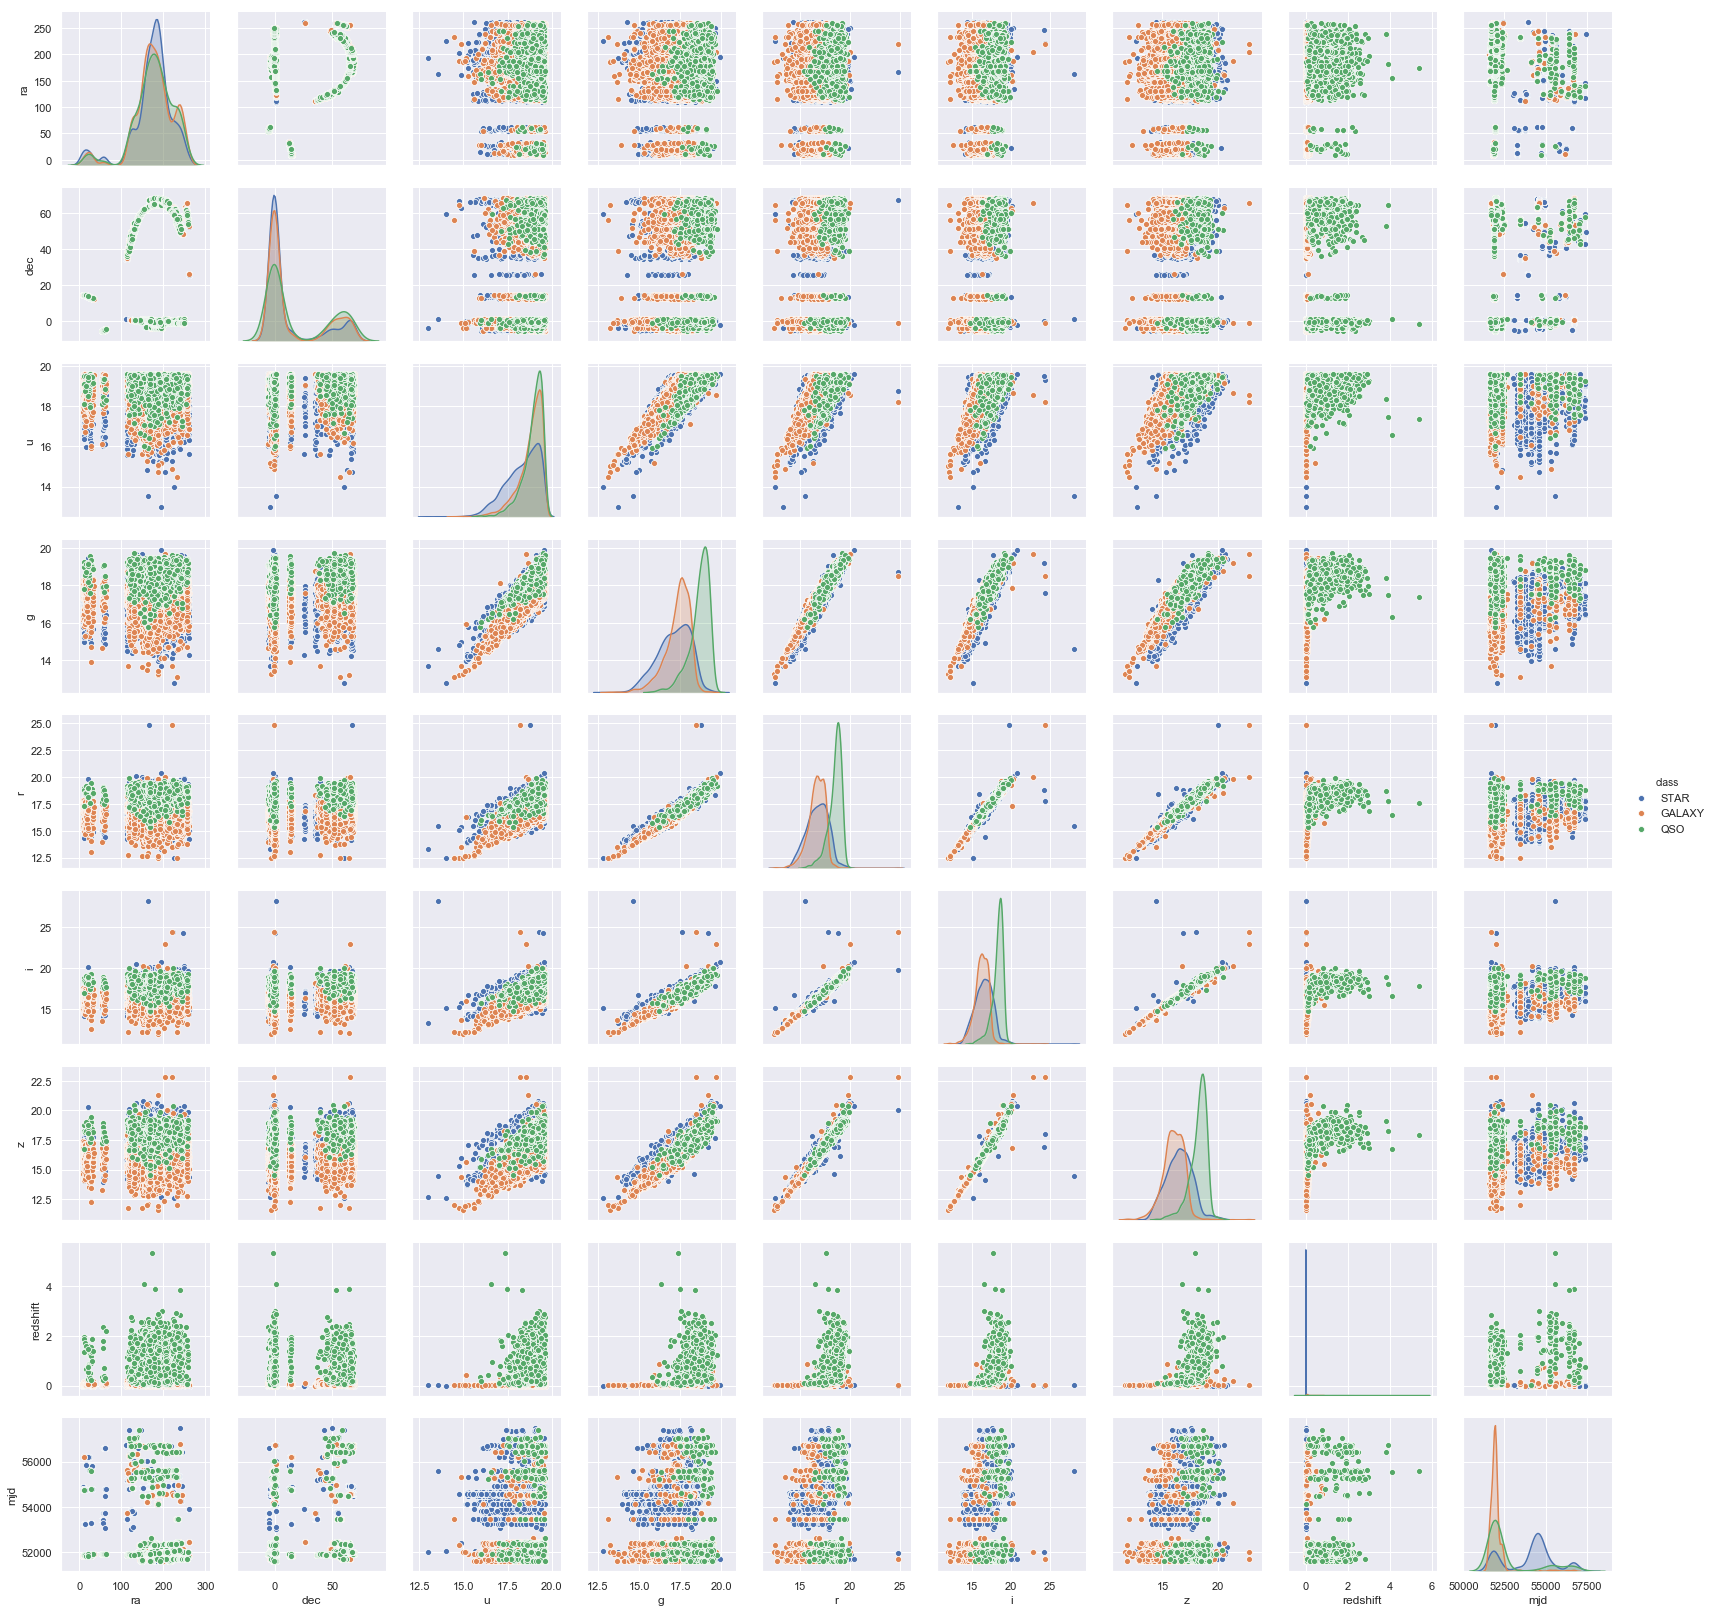

In [14]:
sns.pairplot(sloan, hue='class')

Can we say that hotter objects emit more of every wavelength?

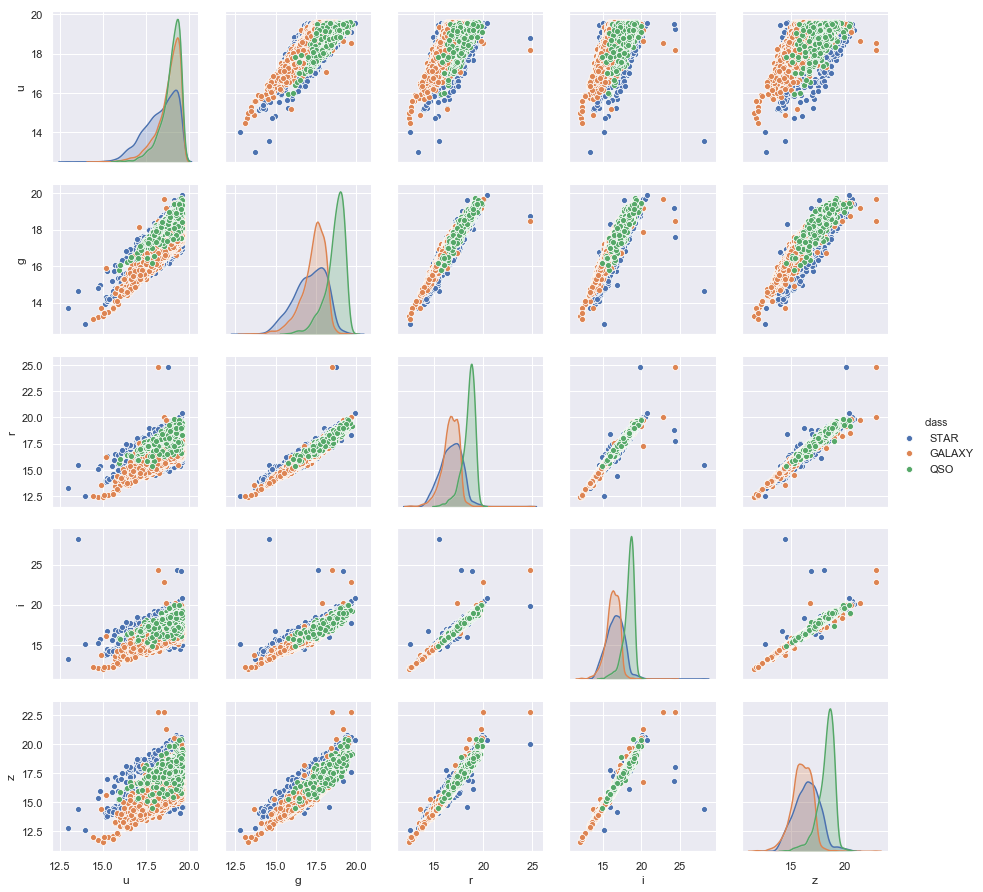

In [15]:
sns.pairplot(sloan[['u','g','r','i','z','class']], hue='class')

*ugriz* correlation looks in accordance with expected physical behaviour - Hotter objects emit more of every wavelength. Can we represent the relationship between these variables in a more efficient manner?

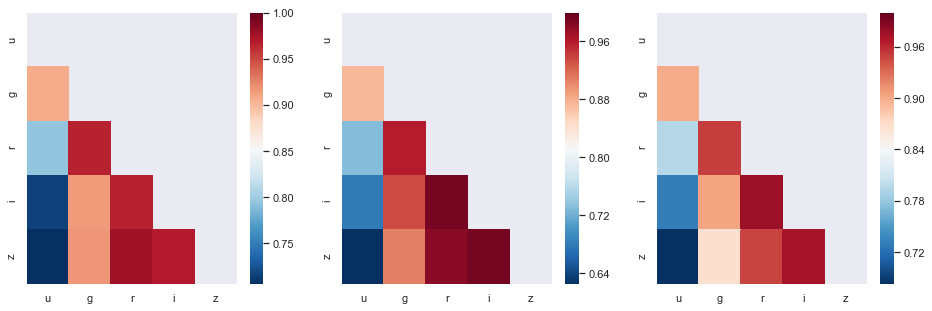

In [16]:
f, axes = plt.subplots(1, 3, figsize=(16, 5))

star_corr = sloan.loc[sloan['class']=='STAR', ['u','g','r','i','z']].corr()
galaxy_corr = sloan.loc[sloan['class']=='GALAXY', ['u','g','r','i','z']].corr()
qso_corr = sloan.loc[sloan['class']=='QSO', ['u','g','r','i','z']].corr()

msk = np.zeros_like(star_corr)
msk[np.triu_indices_from(msk)] = True

sns.heatmap(star_corr, cmap='RdBu_r', mask=msk, ax=axes[0])
sns.heatmap(galaxy_corr, cmap='RdBu_r', mask=msk, ax=axes[1])
sns.heatmap(qso_corr, cmap='RdBu_r', mask=msk, ax=axes[2])

This also tells us that all wavelength radiations are strongly correlated... except *u*. Why?

Find Out: What can be possible reasons for low *u* correlation?

How are the objects positioned in space?

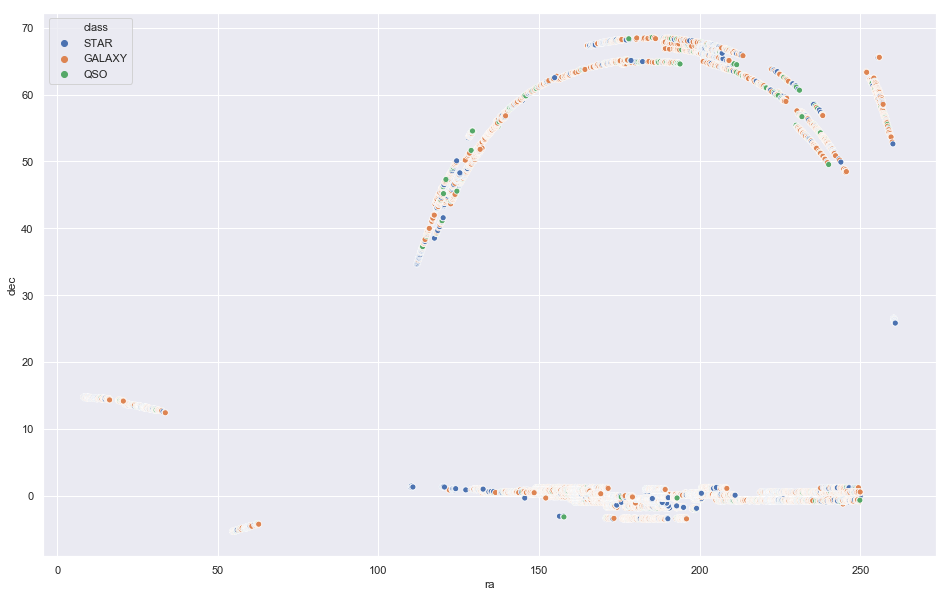

In [17]:
f, ax = plt.subplots(figsize=(16, 10))
sns.scatterplot(x='ra', y='dec', hue='class', data=sloan)

Redshift gives us the distance between us and the object. We can incorporate it to get a more representative view

In [18]:
lbl = LabelEncoder()
cls_enc = lbl.fit_transform(sloan['class'])

g = go.Scatter3d(
    x=sloan['ra'], y=sloan['dec'], z=sloan['redshift'],
    mode='markers',
    marker=dict(
        color=cls_enc,
        opacity=0.5,
    )
)

g_data = [g]

layout = go.Layout(margin=dict(
    l=0, r=0, b=0, t=0
))

figure = go.Figure(data=g_data, layout=layout)

iplot(figure, filename='3d-repr-redshift')

# Q3. Can we learn from the data? (Fitting models)

## Data Preparation

In [19]:
sloan.drop(columns=['mjd'], inplace=True)

In [20]:
lbl_enc = LabelEncoder()
sloan['class'] = lbl_enc.fit_transform(sloan['class'])

In [21]:
sloan.head()

,ra,dec,u,g,r,i,z,class,redshift
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,2,-0.000009
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,2,-0.000055
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,0,0.123111
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,2,-0.000111
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,2,0.000590


In [22]:
X = sloan.drop(columns=['class'])
y = sloan['class']

In [23]:
strat_split = StratifiedShuffleSplit(n_splits=1, train_size=0.9, random_state=42)

for train_index, test_index in strat_split.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

d:\work\.dl-env\lib\site-packages\sklearn\model_selection\_split.py:1639: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.



In [24]:
X_train.shape

(9000, 8)

In [25]:
y_train.shape

(9000,)

In [26]:
X_test.shape

(1000, 8)

In [27]:
y_test.shape

(1000,)

In [28]:
strat_split_val = StratifiedShuffleSplit(n_splits=1, train_size=0.75, random_state=42)

for train_index, val_index in strat_split.split(X_train, y_train):
    X_train, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

d:\work\.dl-env\lib\site-packages\sklearn\model_selection\_split.py:1639: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.



In [29]:
X_train.shape

(8100, 8)

In [30]:
y_train.shape

(8100,)

In [31]:
X_val.shape

(900, 8)

In [32]:
y_val.shape

(900,)

In [33]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)

In [34]:
X_train_scaled.head()

,ra,dec,u,g,r,i,z,redshift
0,0.812897,1.907756,1.108729,1.391235,1.471713,1.513956,1.588753,-0.369206
1,-1.085601,-0.552607,0.889859,0.860597,0.913611,0.966084,0.984500,-0.368231
2,-0.283339,-0.628524,-0.101752,0.616654,0.495003,0.546281,0.627326,-0.266770
3,-2.429116,-0.777503,-0.273198,-0.384788,-0.305745,-0.168928,-0.120655,-0.323557
4,1.514359,-0.559242,-0.802998,0.242877,0.770274,1.026171,1.234785,-0.369064


In [35]:
y_val.value_counts()

0    450
2    374
1     76
Name: class, dtype: int64

In [36]:
lbl_enc.classes_

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

## Models

### K Nearest Neighbors

Cost

Euclidean Distance

In [37]:
knn = KNeighborsClassifier(n_jobs=-1)

In [38]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')

In [39]:
accuracy_score(y_val, knn.predict(X_val_scaled))

0.9044444444444445

In [40]:
confusion_matrix(y_val, knn.predict(X_val_scaled))

array([[394,   2,  54],
       [  5,  71,   0],
       [ 25,   0, 349]], dtype=int64)

### Logistic Regression

Predict (Closed Form)

$$\hat p = \sigma(\theta^T \cdot X)$$
$$\hat y = 
\begin{cases}
0, & \text{if $\hat p \leq$ 0.5} \\
1, & \text{if $\hat p \geq$ 0.5}
\end{cases}
$$

where

$$\sigma(x) = \frac{1}{1 + e^-x}$$

Cost

$$
c(\theta) =
\begin{cases}
-\log(\hat y),  & \text{if y = 1} \\
-\log(1 - \hat y), & \text{if y = 0}
\end{cases}
$$

In [41]:
log_reg = LogisticRegression(n_jobs=-1)

In [42]:
log_reg.fit(X_train, y_train)

d:\work\.dl-env\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
accuracy_score(y_val, log_reg.predict(X_val))

0.9377777777777778

In [44]:
confusion_matrix(y_val, log_reg.predict(X_val))

array([[411,   2,  37],
       [ 10,  66,   0],
       [  7,   0, 367]], dtype=int64)

### SGD Classifier

Cost Derivative

$$
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^m (\sigma(\theta^T \cdot x^{(i)}) - y^{(i)})x^{(i)}_{j}
$$

Training

$$
\theta_{j+1} = \theta_j - \eta \nabla MSE(\theta)
$$

In [45]:
sgd_cls = SGDClassifier(n_jobs=-1)

In [46]:
sgd_cls.fit(X_train_scaled, y_train)

d:\work\.dl-env\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning:

max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.



SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=-1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [47]:
accuracy_score(y_val, sgd_cls.predict(X_val_scaled))

0.9377777777777778

In [48]:
confusion_matrix(y_val, sgd_cls.predict(X_val_scaled))

array([[419,   2,  29],
       [ 10,  66,   0],
       [ 15,   0, 359]], dtype=int64)

### SVC

Minimise

$$\frac{1}{2} w^T \cdot w$$

given

$$t(w^T\cdot x + b) \geq 1$$

In [49]:
svc_cls = SVC()

In [50]:
svc_cls.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [51]:
accuracy_score(y_val, svc_cls.predict(X_val_scaled))

0.9622222222222222

In [52]:
confusion_matrix(y_val, svc_cls.predict(X_val_scaled))

array([[423,   2,  25],
       [  5,  71,   0],
       [  2,   0, 372]], dtype=int64)

### Decision Tree Classifier

Split on highest information gain

In [53]:
tree = DecisionTreeClassifier()

In [54]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [55]:
accuracy_score(y_val, tree.predict(X_val))

0.9855555555555555

In [56]:
confusion_matrix(y_val, tree.predict(X_val))

array([[442,   7,   1],
       [  5,  71,   0],
       [  0,   0, 374]], dtype=int64)

In [ ]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Ensembles

#### Random Forest Classifier

In [57]:
rf = RandomForestClassifier(n_jobs=-1, oob_score=True)

In [58]:
rf.fit(X_train, y_train)

d:\work\.dl-env\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

d:\work\.dl-env\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning:

invalid value encountered in true_divide



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [59]:
rf.oob_score_

0.9769135802469135

In [60]:
accuracy_score(y_val, rf.predict(X_val))

0.9888888888888889

In [61]:
confusion_matrix(y_val, rf.predict(X_val))

array([[445,   2,   3],
       [  4,  72,   0],
       [  1,   0, 373]], dtype=int64)

#### GradientBoosting Classifier

In [62]:
xgb_cls = GradientBoostingClassifier()

In [63]:
xgb_cls.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [64]:
accuracy_score(y_val, xgb_cls.predict(X_val))

0.99

In [65]:
confusion_matrix(y_val, xgb_cls.predict(X_val))

array([[447,   2,   1],
       [  5,  71,   0],
       [  0,   1, 373]], dtype=int64)

#### Extremely Randomised Trees

In [66]:
etree = ExtraTreesClassifier(oob_score=True, n_jobs=-1, bootstrap=True)

In [67]:
etree.fit(X_train, y_train)

d:\work\.dl-env\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

d:\work\.dl-env\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning:

invalid value encountered in true_divide



ExtraTreesClassifier(bootstrap=True, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [68]:
accuracy_score(y_val, etree.predict(X_val))

0.9822222222222222

In [69]:
etree.oob_score_

0.9564197530864198

In [70]:
confusion_matrix(y_val, etree.predict(X_val))

array([[439,   2,   9],
       [  4,  72,   0],
       [  1,   0, 373]], dtype=int64)

# Q4. Can we verify the model performances? (Cross Validation)

Selected models
1. ExtraTreesClassifier
2. GradientBoostingClassifier
3. DecisonTreeClassifier
4. RandomForestClassifier

In [71]:
def display_scores(scores):
    print(scores)
    print('Mean: {}'.format(scores.mean()))
    print('Std: {}'.format(scores.std()))

## ExtraTreesClassifier CV

In [72]:
etree_scores = cross_val_score(etree, X_train, y_train, cv=10, n_jobs=-1)

In [73]:
display_scores(etree_scores)

[0.97780518 0.9864365  0.97903822 0.98148148 0.97901235 0.97777778
 0.98641975 0.97160494 0.97775031 0.97648515]
Mean: 0.9793811655190984
Std: 0.004249179936367644


## GradientBoostingClassifier CV

In [74]:
xgb_cls_scores = cross_val_score(xgb_cls, X_train, y_train, cv=10, n_jobs=-1)

In [75]:
display_scores(xgb_cls_scores)

[0.99383477 0.98766954 0.99260173 0.98641975 0.98395062 0.98765432
 0.99506173 0.97901235 0.99381953 0.99009901]
Mean: 0.9890123347540942
Std: 0.004827155688728657


## DecisionTreeClassifier CV

In [76]:
tree_scores = cross_val_score(tree, X_train, y_train, cv=10, n_jobs=-1)

In [77]:
display_scores(tree_scores)

[0.98766954 0.9864365  0.99260173 0.98641975 0.98395062 0.98641975
 0.98765432 0.9691358  0.9802225  0.98267327]
Mean: 0.9843183779337501
Std: 0.005953311283000562


## RandomForestClassifier CV

In [78]:
rf_scores = cross_val_score(rf, X_train, y_train, cv=10, n_jobs=-1)

In [79]:
display_scores(rf_scores)

[0.99260173 0.9864365  0.99383477 0.98765432 0.98765432 0.98518519
 0.99382716 0.98271605 0.99134734 0.98886139]
Mean: 0.9890118761874536
Std: 0.003597371854270909


Random Forest and Gradient Boosting perform equally well. We will select Random Forest for parameter tuning

# Q5. Is it possible to fine-tune our model to the problem? (Hyper-parameter tuning)

In [80]:
param_grid_rf = {
    'criterion': ['gini', 'entropy'],
    'max_features': [0.5, 0.75, 0.9, 'auto'],
    'min_samples_leaf': [1, 2, 3, 4],
    'n_estimators': [5, 10, 20, 50, 75, 100]
}

In [81]:
cv_rf = GridSearchCV(rf, param_grid_rf, n_jobs=-1, refit=True, verbose=1)

In [82]:
cv_rf.fit(X_train, y_train)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   53.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed:  2.7min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'n_estimators': [5, 10, 20, 50, 75, 100], 'min_samples_leaf': [1, 2, 3, 4], 'max_features': [0.5, 0.75, 0.9, 'auto']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [83]:
cv_rf.best_params_

{'criterion': 'entropy',
 'max_features': 0.75,
 'min_samples_leaf': 1,
 'n_estimators': 75}

In [84]:
cv_rf.best_score_

0.9911111111111112

In [85]:
final_model = cv_rf.best_estimator_

# Q6. Can we predict new instances? (Deployment and Prediction)

Looking at test set

In [86]:
accuracy_score(y_test, final_model.predict(X_test))

0.994

In [87]:
confusion_matrix(y_test, final_model.predict(X_test))

array([[498,   1,   1],
       [  3,  82,   0],
       [  1,   0, 414]], dtype=int64)

Precision, Recall and F1 score

In [88]:
precision_score(y_test, final_model.predict(X_test), average='weighted')

0.993991839869438

In [89]:
recall_score(y_test, final_model.predict(X_test), average='weighted')

0.994

In [90]:
f1_score(y_test, final_model.predict(X_test), average='weighted')

0.9939821785001426

http://skyserver.sdss.org/dr14/en/tools/search/sql.aspx

SELECT TOP 20 s.specObjID, s.ra, s.dec, s.z, s.class FROM SpecObjAll as s WHERE s.dec >= 0 AND s.dec <= 1.1

In [104]:
new_df = pd.read_clipboard()

In [105]:
new_df

,specObjID,ra,dec,z,class
0,8175282204789678080,80.225128,0.737776,0.985760,QSO
1,8175196442882711552,81.749504,0.798822,0.844720,QSO
2,8171991641399205888,100.359700,-0.056306,0.000000,GALAXY
3,8171798677108531200,101.720380,-0.898389,0.152554,QSO
4,8171878666579451904,100.645040,-0.517579,-0.000104,STAR
5,8171867946341081088,100.686550,-0.473491,-0.000031,STAR
6,8171879491213172736,100.662450,-0.466668,-0.000019,STAR
7,8171938315085258752,99.988792,-0.044522,0.000037,STAR
8,8171913301195726848,99.890579,-0.506915,0.000120,STAR
9,8171910002660843520,99.983269,-0.925072,-0.000010,STAR


In [96]:
new_obj = np.array([[18.87684, -0.860973, 14.83, 13.74, 13.19, 12.92, 12.94, 5.83e-3]])

In [99]:
lbl_enc.inverse_transform(final_model.predict(new_obj))

array(['GALAXY'], dtype=object)

In [102]:
qso_object = np.array([[146.938623, -0.687016, 21.56, 19.69, 19.34, 18.91, 18.63, 1.536]])

In [103]:
lbl_enc.inverse_transform(final_model.predict(qso_object))

array(['QSO'], dtype=object)

# Pipeline

## Frame problem and look at the big picture

## Setup data sources

## Explore data

## Prepare data

## Short-list promising models

## Fine-tune the system

## Communicate your results

## Deploy